Epoch 1/10
94/94 [==============================] - 17s 165ms/step - loss: 0.7459 - accuracy: 0.7249 - val_loss: 0.5951 - val_accuracy: 0.7754
Epoch 2/10
94/94 [==============================] - 15s 165ms/step - loss: 0.5528 - accuracy: 0.7977 - val_loss: 0.5520 - val_accuracy: 0.7874
Epoch 3/10
94/94 [==============================] - 15s 161ms/step - loss: 0.4940 - accuracy: 0.8167 - val_loss: 0.5570 - val_accuracy: 0.7874
Epoch 4/10
94/94 [==============================] - 18s 187ms/step - loss: 0.4644 - accuracy: 0.8248 - val_loss: 0.5965 - val_accuracy: 0.7887
Epoch 5/10
94/94 [==============================] - 17s 185ms/step - loss: 0.4372 - accuracy: 0.8319 - val_loss: 0.5733 - val_accuracy: 0.7847
Epoch 6/10
94/94 [==============================] - 17s 181ms/step - loss: 0.4085 - accuracy: 0.8447 - val_loss: 0.5887 - val_accuracy: 0.7688
Epoch 7/10
94/94 [==============================] - 17s 186ms/step - loss: 0.3839 - accuracy: 0.8559 - val_loss: 0.6385 - val_accuracy: 0.7668

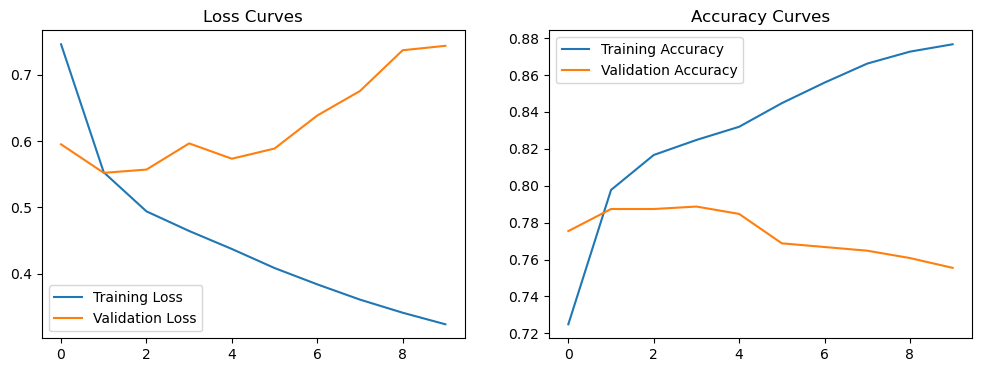

59/59 [==============================] - 4s 39ms/step


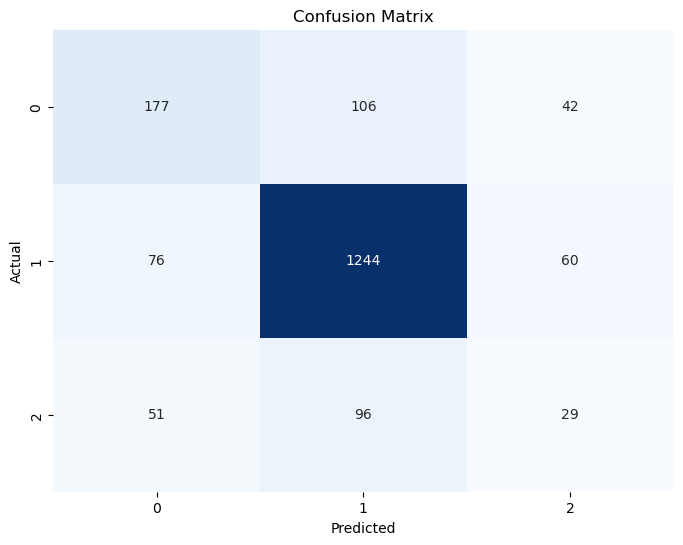

Accuracy: 0.7708665603402446
Precision: 0.7524767266122951
Recall: 0.7708665603402446
F1 Score: 0.7608224964083933

Classification Report:
               precision    recall  f1-score   support

         Bad       0.58      0.54      0.56       325
        Good       0.86      0.90      0.88      1380
    Moderate       0.22      0.16      0.19       176

    accuracy                           0.77      1881
   macro avg       0.55      0.54      0.54      1881
weighted avg       0.75      0.77      0.76      1881



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support

data = pd.read_excel("Book1.xlsx")
reviews = data["processed_reviews"]
target = data["review_tag"]

label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
X = pad_sequences(sequences, maxlen=100)  # You can adjust the maxlen as needed

X_train, X_test, y_train, y_test = train_test_split(X, target_encoded, test_size=0.2, random_state=42)

num_classes = len(label_encoder.classes_)
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=100))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, predicted_labels)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predicted_labels, average='weighted')

report = classification_report(y_test, predicted_labels, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("\nClassification Report:\n", report)
